In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('check1.data',delim_whitespace=True,header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,1,3,5,7,8,9
1,2,6,7,11,15,17
2,3,8,9,15,19,25
3,5,9,11,100,20,50
4,6,14,30,40,50,70


In [4]:
col_name=['s1','s2','s3','s4','s5','s6']

In [5]:
df.columns=col_name

In [6]:
print(df.columns)

Index(['s1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [7]:
df.head()

,s1,s2,s3,s4,s5,s6
0,1,3,5,7,8,9
1,2,6,7,11,15,17
2,3,8,9,15,19,25
3,5,9,11,100,20,50
4,6,14,30,40,50,70


In [8]:
df.describe()

,s1,s2,s3,s4,s5,s6
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.400000,8.000000,12.400000,34.600000,22.400000,34.200000
std,2.073644,4.062019,10.089599,38.759515,16.133815,25.232915
min,1.000000,3.000000,5.000000,7.000000,8.000000,9.000000
25%,2.000000,6.000000,7.000000,11.000000,15.000000,17.000000
50%,3.000000,8.000000,9.000000,15.000000,19.000000,25.000000
75%,5.000000,9.000000,11.000000,40.000000,20.000000,50.000000
max,6.000000,14.000000,30.000000,100.000000,50.000000,70.000000


In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
col_study=['s1','s2']

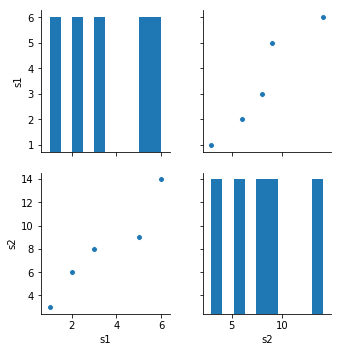

In [12]:
sns.pairplot(df[col_study],size=2.5)

In [13]:
pd.options.display.float_format = '{:,.4f}'.format

In [14]:
df.corr()

,s1,s2,s3,s4,s5,s6
s1,1.0000,0.9498,0.8388,0.7023,0.8534,0.9871
s2,0.9498,1.0000,0.9272,0.4494,0.9537,0.9537
s3,0.8388,0.9272,1.0000,0.2569,0.9940,0.9020
s4,0.7023,0.4494,0.2569,1.0000,0.2522,0.6412
s5,0.8534,0.9537,0.9940,0.2522,1.0000,0.9037
s6,0.9871,0.9537,0.9020,0.6412,0.9037,1.0000


In [15]:
plt.figure(figsize=(16,10))

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

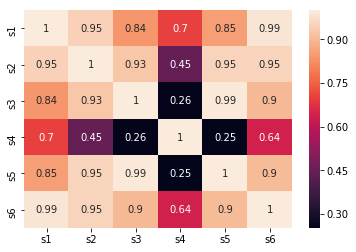

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
df.head()

,s1,s2,s3,s4,s5,s6
0,1,3,5,7,8,9
1,2,6,7,11,15,17
2,3,8,9,15,19,25
3,5,9,11,100,20,50
4,6,14,30,40,50,70


In [18]:
X=df['s1'].values.reshape(-1,1)

In [19]:
y=df['s2'].values

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
model.coef_

array([1.86046512])

In [24]:
model.intercept_

1.6744186046511622

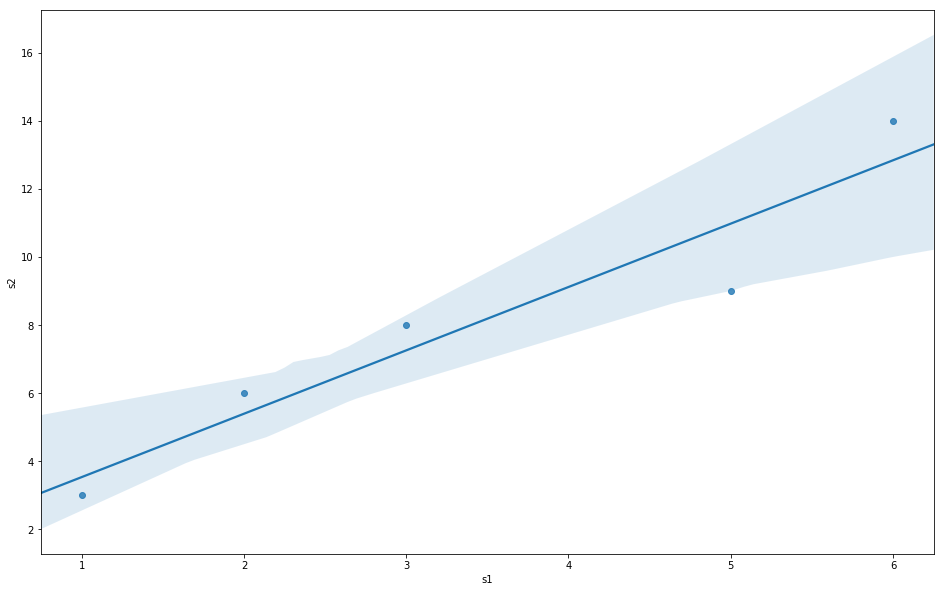

In [25]:
plt.figure(figsize=(16,10))
sns.regplot(X,y);
plt.xlabel('s1');
plt.ylabel('s2');
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=df['s1'].values.reshape(-1,1)

In [28]:
y=df['s2'].values

In [29]:
print(X)
print("\n")
print(y)

[[1]
 [2]
 [3]
 [5]
 [6]]


[ 3  6  8  9 14]


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
print(X_train,"p",X_test,"P",y_train,"P",y_test)

[[1]
 [2]
 [5]
 [6]] p [[3]] P [ 3  6  9 14] P [8]


In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#print(lr.coef_)

In [33]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(lr.coef_,lr.intercept_)
 y=mx+c--> 0*3+3=3

[1.88235294] 1.4117647058823533


In [35]:
print(lr.predict(X_test))


[7.05882353]


In [45]:
y_test_pred=lr.predict(X_test)
print(X_train)
print("test=", X_test)
print(y_train)
print(y_test)

print(y_test_pred)
print(lr.coef_)
print(lr.intercept_)
y_train_pred=lr.predict(X_train)
print(y_train_pred)

print(y_test_pred)



[[1]
 [2]
 [5]
 [6]]
test= [[3]]
[ 3  6  9 14]
[8]
[7.05882353]
[1.88235294]
1.4117647058823533
[ 3.29411765  5.17647059 10.82352941 12.70588235]
[7.05882353]


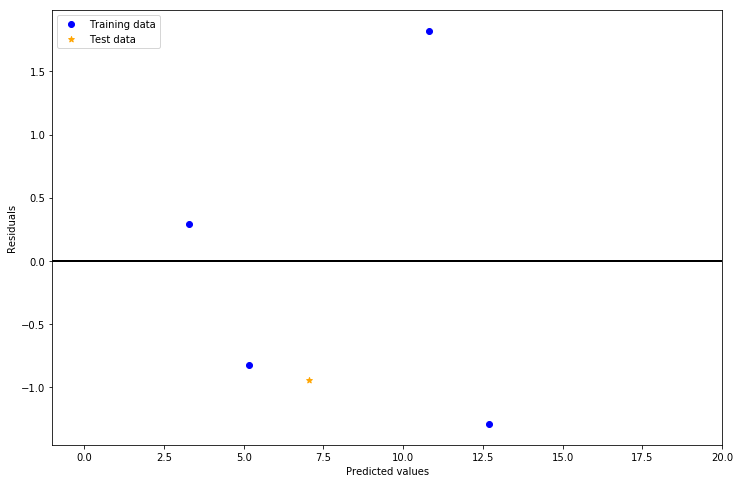

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1, xmax=20, lw=2, color='k')
plt.xlim([-1, 20])
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_train,y_train_pred)

1.4411764705882362

In [51]:
mean_squared_error(y_test, y_test_pred)

0.8858131487889277

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_train,y_train_pred)#1-(total sum of residual)/(total sum of sq) = 1-(3-3)^2/(quantity 2)^2 = 1-0/4 = 1


0.9126559714795008

In [54]:
r2_score(y_test,y_test_pred) #1-(total sum of residual)/(total sum of sq) = 1-(5-3)^2/(quantity 2)^2 = 1-4/4 = 0

0.0

In [ ]:
#Backend Implementation